# Practical Data Visualization with Python - Part 2: Overview of Python Visualization Landscape

## Setup

In [1]:
%%capture
# capturing above because there are a few useless warnings that might pop up, version-depending

# basic packages:
import numpy as np
import pandas as pd
import datetime
from scipy import stats

# packages for viz:
# plotly express
import plotly_express as px
# matplotlib
import matplotlib.pyplot as plt
# seaborn and default seaborn settings set for matplot lib charts
import seaborn as sns; sns.set()
# base plotly packages
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
# turns on plotly notebook mode
init_notebook_mode()
from plotly import graph_objs as go
# altair
import altair as alt
# turns on altair renderer -- jlab is default
alt.renderers.enable('jupyterlab')
# bokeh
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
# plotnine
from plotnine import *

In [2]:
# there are a few warnings I want to silence throughout that are due to unimportant np deprecations 
np.warnings.filterwarnings('ignore')

In [3]:
# store the datetime of the most recent running of this notebook as a form of a log
most_recent_run_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M")
f"This notebook was last executed on {most_recent_run_datetime}"

'This notebook was last executed on 2019-08-08 11:43'

In [4]:
# pulling in our main data; for more info on the data, see the "data_prep_nb.ipynb" file
main_df = pd.read_csv(filepath_or_buffer='../data/jan_and_dec_17_acqs.csv')

# taking a peek at our data
main_df.head()

,loan_id,orig_chn,seller_name,orig_rt,orig_amt,orig_trm,orig_dte,frst_dte,oltv,ocltv,...,occ_stat,state,zip_3,mi_pct,product_type,cscore_c,mi_type,relocation_flg,cscore_min,orig_val
0,100020736692,B,"CALIBER HOME LOANS, INC.",4.875,492000,360,12/2017,02/2018,75,75,...,I,CA,920,NaN,FRM,NaN,NaN,N,757.0,656000.000000
1,100036136334,R,OTHER,2.750,190000,180,12/2017,01/2018,67,67,...,P,MD,206,NaN,FRM,798.0,NaN,N,797.0,283582.089552
2,100043912941,R,OTHER,4.125,68000,360,12/2017,02/2018,66,66,...,P,OH,432,NaN,FRM,NaN,NaN,N,804.0,103030.303030
3,100057175226,R,OTHER,4.990,71000,360,12/2017,02/2018,95,95,...,P,NC,278,30.0,FRM,NaN,1.0,N,696.0,74736.842105
4,100060715643,R,OTHER,4.500,180000,360,12/2017,02/2018,75,75,...,I,WA,983,NaN,FRM,NaN,NaN,N,726.0,240000.000000


In [5]:
# pre-visualization data prep:
# creating a df with just the january origination volume of our top 3 lenders by volume in that month

# filtering to just january acquisitions and dropping "OTHER" sellers
jan_originations_only = main_df.loc[(main_df['orig_dte'] == '01/2017') & (main_df['seller_name'] != 'OTHER'),:]

# getting the top 3 lenders by volume
top_3_lenders = (
    jan_originations_only
    .groupby('seller_name')
    .size()
    .reset_index(name='counts')
    .sort_values('counts', ascending=False)
    .head(3)
)['seller_name']

# making a df of just the records from the top 3 lenders by volume, keeping just the needed columns: seller name and FICO
top_3_lenders_jan_origs_df = jan_originations_only.loc[main_df['seller_name'].isin(top_3_lenders),['seller_name','cscore_min']]

# inspecting the data we'll be working with for this example
top_3_lenders_jan_origs_df.head()

,seller_name,cscore_min
2803,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",724.0
3208,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",744.0
8514,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",695.0
10496,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",738.0
10788,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",701.0


## Overview of Python Visualization Landscape 

Now that we've learned some heuristics and best practices to help us craft clear and powerfully informative visualizations, let's dive into a broad overview of the smorgasboard of libraries that exist in the python ecosystem to help us build visualizations. 

### Intro to the visualization ecosystem: python's Tower of Babel.

One of the great use cases for python in data science is the creation of high quality visualizations, but it is important to understand that with python, visualization often requires a wide variety of packages. When compared to the [ggplot](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)-dominated world of data visualization with R, python appears at first glance to be a veritable [Tower of Babel](https://en.wikipedia.org/wiki/Tower_of_Babel). 

The story of the Tower of Babel, to summarize a great deal, was essentially that many people became some prideful of their creation--a physical tower--that God made them all speak in different languages, confounding the people and scattering them across the world, thereby breaking them out of their pride in their tower. While the diversity of libraries in the Python ecosystem parallels the diversity of languages in this story, this diversity need not have the confounding effects it did to the people of Babel. The image below presents an initially daunting view of the wide variety of visualization packages in the python ecosystem, but when examined more closely, the packages serve unique purposes. 

---

![](../media/python_viz_landscape.jpg)

---

The best example of a thorough explanation of the relative utility of this seemingly-disjointed system of packages comes from Anaconda's James Bednar, whose [write-up here](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/) I highly recommend reading. As he describes, most packages have one or two main target use cases--for example there are a suite of packages that focus on visualization very large datasets, whereas others focus on crisp interactivity. As you continue to improve your visualization skills in python, asking yourself what features you think are most important about a particular viz. will help you discern which packages best suit your needs. 

With this understanding of how vast the python visualization package ecosystem is in mind, let's proceed to looking at a few of the most widely-used libraries in more detail.

### Smorgasbord of packages explored through a single example viz.

In this section, we'll take a relatively simple chart type and explore how it can be built using a variety of the most common visualization packages in the Python ecosystem today. Each example will be accompanied by a link to the relevant documentation, as well as some brief commentary about the structure of the package's API. The packages for which we'll be building example plots are:

- plotly
- altair
- bokeh
- plotnine
- matplotlib
- seaborn

The chart that we'll build is a **scatterplot of FICO vs. LTV colored by lender**. More specifically, we'll be using a down-sampled (10% for speed and simplicity) version of the previously-explored df of data from the top 3 lenders by volume, retaining the LTV variable in addition to seller name and credit score. We'll start as always by building our needed dataset, and then we'll dive into the example visualizations for each package.

**Note:** for each of the examples below, we won't necessarily be building the optimal chart, but rather focusing on demonstrating the basic functionality of each library's API structure. As such, there will, with each chart, likely be margin for improvement--better-formatted legends, axis labels, etc.--but each example will serve as an example of a [standard MVP](https://en.wikipedia.org/wiki/Minimum_viable_product) from each library. 

In [6]:
# making a df of just the records from the top 3 lenders by volume, keeping just the needed columns: seller name, FICO, and LTV
downsamp_top_3_lenders_df = (
    jan_originations_only
    .loc[main_df['seller_name'].isin(top_3_lenders),['seller_name','cscore_min','oltv']]
    # downsampling by taking 10% of the base population
    .sample(frac = 0.1)
)

# inspecting the data we'll be working with for this example
downsamp_top_3_lenders_df.head()

,seller_name,cscore_min,oltv
30697,"WELLS FARGO BANK, N.A.",806.0,90
122590,QUICKEN LOANS INC.,666.0,59
45466,"WELLS FARGO BANK, N.A.",804.0,80
89479,"WELLS FARGO BANK, N.A.",757.0,95
27582,"WELLS FARGO BANK, N.A.",707.0,77


**Plotly Express Example:**

- [Link to documentation here](https://plot.ly/python/plotly-express/).
- With plotly express, the full figure is created with a single call to `px.scatter()`. 
- Note that column names are passed as text to the x and y params, etc. 
- Plotly express best for fast, low-customization-heavy charts, particularly when you need interactivity. See final section on Plotly deep dive for more info.
- Note the somewhat-annoying legend location. We'll come back to this later in the deep-dive!

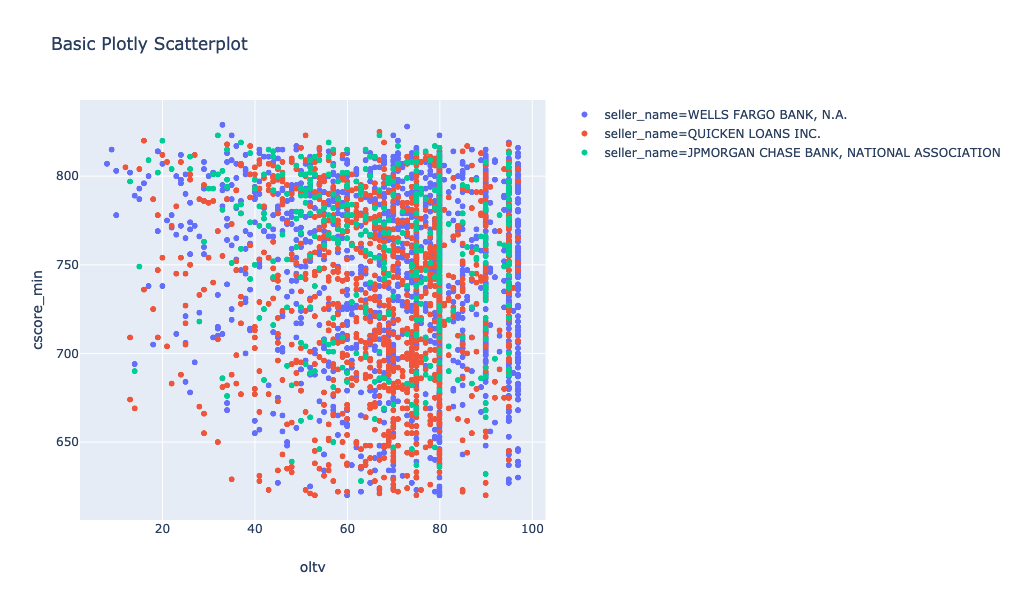

In [7]:
# single call to px.scatter creates the plotly express figure
basic_plotly_fig = px.scatter(
    # select data frame of reference
    data_frame = downsamp_top_3_lenders_df, 
    # column name of x-axis data
    x = "oltv", 
    # column name of y-axis data
    y = "cscore_min", 
    # column name of categories to use for colors
    color = "seller_name",
    # text to be used for chart title
    title = "Basic Plotly Scatterplot",
    # setting the size of the plot to be output
    height = 600,
    width = 900
)

# displays the chart in-line
basic_plotly_fig

In [8]:
# saving out the plot
plot(
    figure_or_data = basic_plotly_fig, 
    filename="../media/basic_plotly_fig.html", 
    auto_open=False
);

**Altair Example**:
    
- [Link to documentation here](https://altair-viz.github.io/gallery/scatter_tooltips.html).
- Note the multiple methods involved, and the explicit language of encoding / grammar of graphics, making it good for folks who like a syntax that is focused on preserving the grammar of graphics.
- Encodings composed of column names and `:<type_of_encoding>`, implicitly or explicitly (e.g. `:Q` = quantitative).
- Interactivity turned on by separate method.
- Note the fact that if we want to not include 0 (i.e. we want axes to auto-scale) that must be called manually.
- Saving out PNGs of Altair-made charts can be a bit of pain, as it requires [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/home), so I'm not going to show that here.

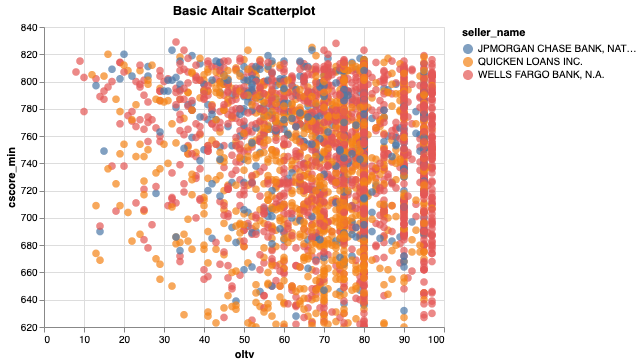

In [9]:
# altair plot construction starts by specifying the df to be charted 
basic_altair_fig = (alt.Chart(downsamp_top_3_lenders_df)
 # next we specify mark type
 .mark_circle(size=60)
 # then we provide details for the encoding
 .encode(
    # the after-colon leters specify variable type (quantitative, nominal, etc.)
    x = 'oltv:Q',
    y = alt.Y('cscore_min:Q', scale = alt.Scale(zero=False)),
    color = 'seller_name:N'
)
 # interactivity specified separately
 .interactive()
 # title included via separate call to properties
).properties(
    title = 'Basic Altair Scatterplot'
)

# displays the chart in-line
basic_altair_fig

In [10]:
# saving out the plot as a png file
# not running this due to chromedriver dependency described above, but this is the code you'd use
# basic_altair_fig.save('../media/basic_matplotlib_fig.png')

**Bokeh Example:**

- [Link to documentation here](https://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html)
- Note that categorical coloring cannot be derived simply from a call to the API, but must be pre-specified.
    - This is getting pretty in the weeds, but you can chalk this up to the fact that Bokeh's API isn't meant to interact most smoothly with ['tidy' data structures](https://vita.had.co.nz/papers/tidy-data.html); rather, most Bokeh visualizations require the crafting of a custom ["column data source"](https://stackoverflow.com/questions/36723684/purpose-of-columndatasource-in-bokeh).
- Title and other properties are specified at the point of instantiation of the figure or added after the fact.
- Best for people that want to build smaller apps and do everything within the Bokeh ecosystem.
- Bouncing back and forth between interactive bokeh viewing and saving bokehs out can be troublesome at times, [as described here](https://stackoverflow.com/questions/51512907/how-to-stop-bokeh-from-opening-a-new-tab-in-jupyter-notebook).

In [11]:
# because bokeh doesn't derive categorical colors, we need to create a new column to color based on lender
# we'll do this with the custom function below
def set_color(row):
    if row['seller_name'] == 'WELLS FARGO BANK, N.A.':
        return "red"
    elif row['seller_name'] == 'QUICKEN LOANS INC.':
        return "blue"
    else:
        return "green"

# updating the df to include a new column for color
downsamp_top_3_lenders_df = (
    downsamp_top_3_lenders_df
    .assign(manual_color = downsamp_top_3_lenders_df.apply(set_color, axis=1))
)

# inspecting the new df we'll need to make the bokeh plot
downsamp_top_3_lenders_df.head()

,seller_name,cscore_min,oltv,manual_color
30697,"WELLS FARGO BANK, N.A.",806.0,90,red
122590,QUICKEN LOANS INC.,666.0,59,blue
45466,"WELLS FARGO BANK, N.A.",804.0,80,red
89479,"WELLS FARGO BANK, N.A.",757.0,95,red
27582,"WELLS FARGO BANK, N.A.",707.0,77,red


In [12]:
# begin by defining the figure space
basic_bokeh_fig = figure(title = "Basic Bokeh Scatterplot", plot_width=400, plot_height=400)

# now that we have our colors set correctly, we can make the plot with one call to the circle renderer
basic_bokeh_fig.circle(
    x = downsamp_top_3_lenders_df['oltv'], 
    y = downsamp_top_3_lenders_df['cscore_min'],
    color = downsamp_top_3_lenders_df['manual_color']
)

# displays the chart in-line
output_notebook()
show(basic_bokeh_fig)

Loading BokehJS ...

In [13]:
# saving out the plot
output_file('../media/basic_bokeh_fig.html')
save(basic_bokeh_fig);

**Plotnine Example:**

- [Link to documentation here](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html).
- Copy of [ggplot syntax](https://ggplot2.tidyverse.org/reference/ggplot.html) almost exactly.
- Note that some arguments are purely positional.
- Main strength is portability / familiarity for those who are coming from an R background.

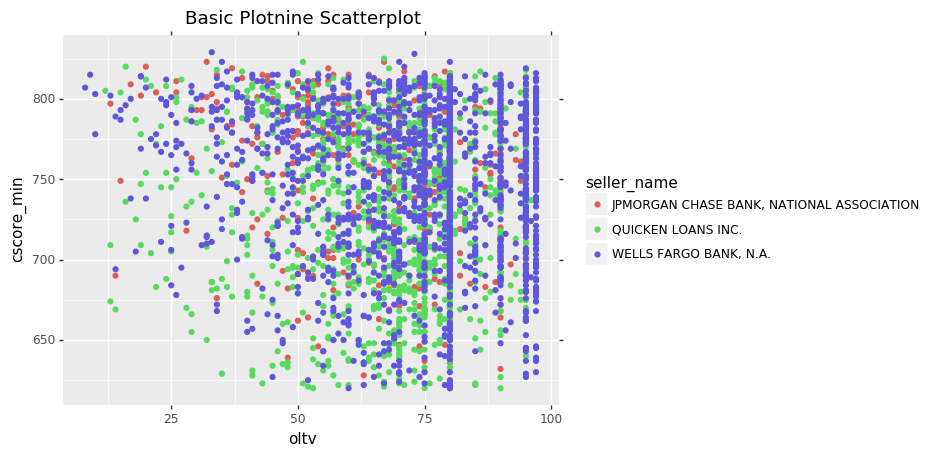

In [14]:
# building the viz starts with call to ggplot with other features added with '+'
basic_plotnine_fig = (ggplot(
    # specifying aesthetics as done with ggplot
    # data comes positionally after aes
    aes(x='oltv', y='cscore_min', color = 'seller_name'), data = downsamp_top_3_lenders_df)
    # specifies scatterplot with geom type
    + geom_point() 
    # adding title
    + ggtitle("Basic Plotnine Scatterplot")
    )

# displays the chart in-line
basic_plotnine_fig.draw();

In [15]:
# saving out the plot
basic_plotnine_fig.save(filename='../media/basic_plotnine_fig.png')

**Matplotlib Example:**

- [Link to documentation here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html).
- Just as we saw with Bokeh, colors cannot be passed to the `plt.scatter()` call by way of a categorical label; they must be pre-specified. [Here is another way](https://stackoverflow.com/questions/8202605/matplotlib-scatterplot-colour-as-a-function-of-a-third-variable) to do this. 
- Note how heavily manual matplotlib is: there are no default axis labels unless specified. This makes matplotlib, while perhaps the most customizable of all the main python plotting libraries, also the most manual.
- Note that the data behind the chart are series that don't need to come from a single dataframe. 

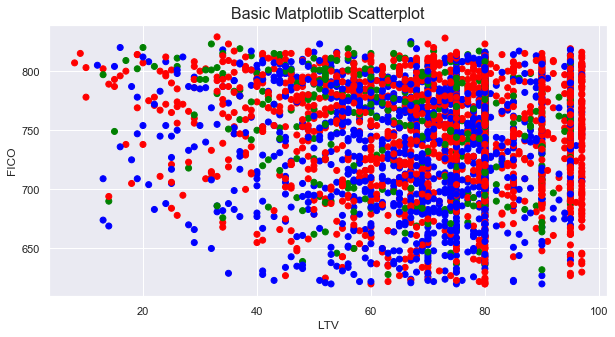

In [16]:
# setting our figure size
plt.figure(figsize=(10, 5))

# constructing the scatterplot with a call to plt.scatter()
basic_matplotlib_fig = plt.scatter(
    # specifying data for x and y axis
    x = downsamp_top_3_lenders_df.loc[:,'oltv'], 
    y = downsamp_top_3_lenders_df.loc[:,'cscore_min'],
    # colors specified manually as described above; a label won't work here
    c = downsamp_top_3_lenders_df.loc[:,'manual_color']
)

# adding some basic chart properties--labels and title
plt.xlabel('LTV', fontsize=12)
plt.ylabel('FICO', fontsize=12)
plt.title('Basic Matplotlib Scatterplot', fontsize = 16)

# saving out the plot
plt.savefig(fname = '../media/basic_matplotlib_fig.png')

# displays the chart in-line
basic_matplotlib_fig;

**Seaborn Example:**

- [Link to documentation here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).
- Note the similarities to matplotlib; it's essentially like matplotlib with more abstractions for convenience.
- Unlike matplotlib, however, the calls to base functions like `sns.scatterplot()` do take a df as an argument.
- You could kind of say that seaborn is to matplotlib what plotly express is to base plotly, as it pertains to statistical visualization. It is an easier-to-use API that allows you to create statistical visualizations that you could create with matplotlib.

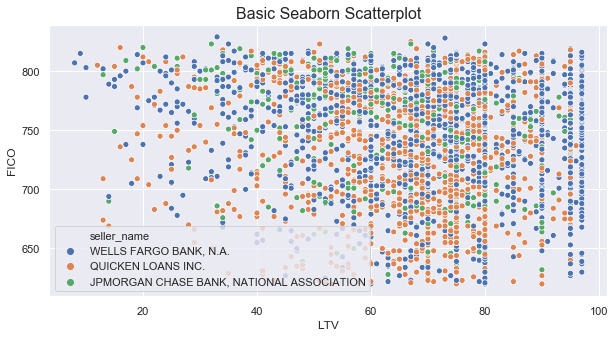

In [17]:
# setting our figure size
plt.figure(figsize=(10, 5))

# creating the figure / axes with a call to sns.scatterplot()
basic_seaborn_fig = sns.scatterplot(
    data = downsamp_top_3_lenders_df, 
    x = 'oltv', 
    y = 'cscore_min', 
    hue = 'seller_name'
)

# setting the axes labels and title
plt.xlabel('LTV', fontsize=12)
plt.ylabel('FICO', fontsize=12)
plt.title("Basic Seaborn Scatterplot", fontsize = 16)

# saving out the plot
plt.savefig(fname = '../media/basic_seaborn_fig.png')

# displays the chart in-line
basic_seaborn_fig;

### Quick & dirty (and subjective) heuristics for picking a visualization package.

Now that we've had a taste of the vast ecosystem of packages from which we can choose when building visualizations in Python, and taken a closer look at some of the APIs, let's end with a few questions that can help us best pick a library given a particular problem. These questions are heuristics that I like to use, and are by no means exhaustive, but I hope they are helpful to you!

1. What packages can you *actually* use on your system?
    - This might seem obvious, but because there are so many packages one could use, you might not be in an environment (for example on a computing grid at work) where you have access to the newest version of a particular package. In circumstances where you don't have full control over the environment and are using a shared environment, you may only have access to basic packages like matplotlib, in which case, you'll make due with what you have!
2. What packages provide the functionality you need given the deliverable required?
    - If you are asked for an interactive visualization, don't start off by diving into a variety of packages that you know cannot produce interactive visualizations. Start by defining what is needed in your final viz--interactivity, scalability, integration with a web app, etc.--and refine your package options as such.
3. With what packages is your team most comfortable?
    - I place this before personal preference because in almost all cases when you are writing code on the job you may have to hand off that code one day, have it QC'ed, etc., and for all these reasons I prefer to not venture too far into the realm of exotic packages unfamiliar to the rest of my team, even if I think I would prefer that personally. 
    - Note, if you know you are not going to have to hand of this code / you seldom work with others in a data science team context, switching the order of #3 and #4 here makes sense (in terms of relative prioritization). 
4. With what packages are you most dangerous?
    - If you have answered the first few questions and still have a handful of options at this stage, it really comes down to a matter of preference. Ask yourself what package you are most comfortable with, and go with that.

**When ready for the next section of content, proceed to `part_3_main_nb.ipynb`**